# Example implementions of AI for number guessing game

## Preparation

What follows is a standard boilerplate as well as importing of some supporting implementation.
You may review it, but there's no need to fully understand it to complete the task.

In [9]:
import random

import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = 16, 9

import pylab

from guess_the_number_ai_lib import Hint, GuessingGame, GuessingGameAi, GuessingGameAiTester

## Example 1: Stupid AI

What follows is an example solution to the problem that is very far from optimal.

In [10]:
class StupidAi(GuessingGameAi):
    """StupidAi is a kind of GuessingGameAi.

    Each time it makes guesses randomly without remembering previous guesses.

    It also ignores the hints.
    """

    def __init__(self, game):
        super().__init__(game)

    def generate_guess(self) -> int:
        guess = random.randrange(*self.game.number_range())
        return guess

    def receive_hint(self, hint: Hint):
        pass


example game:

In [11]:
StupidAi(GuessingGame(0, 10)).generate_guesses_until_hit()

6?
Hint.Lower
5?
Hint.Lower
4?
Hint.Hit


3

## Example 2: Sequencing AI

In [12]:
class SequencingAi(GuessingGameAi):

    """SequencingAi is also a kind of GuessingGameAi.

    It tries guessing the number from minimum in increasing order.

    It also ignores the hints.
    """

    def __init__(self, game):
        super().__init__(game)
        self.curr_number, _ = game.number_range()

    def generate_guess(self) -> int:
        guess = self.curr_number
        self.curr_number += 1
        return guess

    def receive_hint(self, hint: Hint):
        pass

example game:

In [13]:
SequencingAi(GuessingGame(0, 10)).generate_guesses_until_hit()

0?
Hint.Hit


1

## Example 3: Singed Sequencing AI

In [14]:
class SignedSequencingAi(GuessingGameAi):

    """SignedSequencingAi is a kind of GuessingGameAi as well.

    It tries guessing the number from the middle and goes up or down depending on the hint.
    """

    def __init__(self, game):
        super().__init__(game)
        self.curr_number = sum(game.number_range()) // 2
        self.sign = None

    def generate_guess(self) -> int:
        if self.sign == '+':
            self.curr_number += 1
        elif self.sign == '-':
            self.curr_number -= 1
        return self.curr_number

    def receive_hint(self, hint: Hint):
        if hint is Hint.Higher:
            self.sign = '+'
        if hint is Hint.Lower:
            self.sign = '-'

example game:

In [15]:
SignedSequencingAi(GuessingGame(0, 10)).generate_guesses_until_hit()

5?
Hint.Higher
6?
Hint.Higher
7?
Hint.Higher
8?
Hint.Higher
9?
Hint.Hit


5

## Testing the example AIs

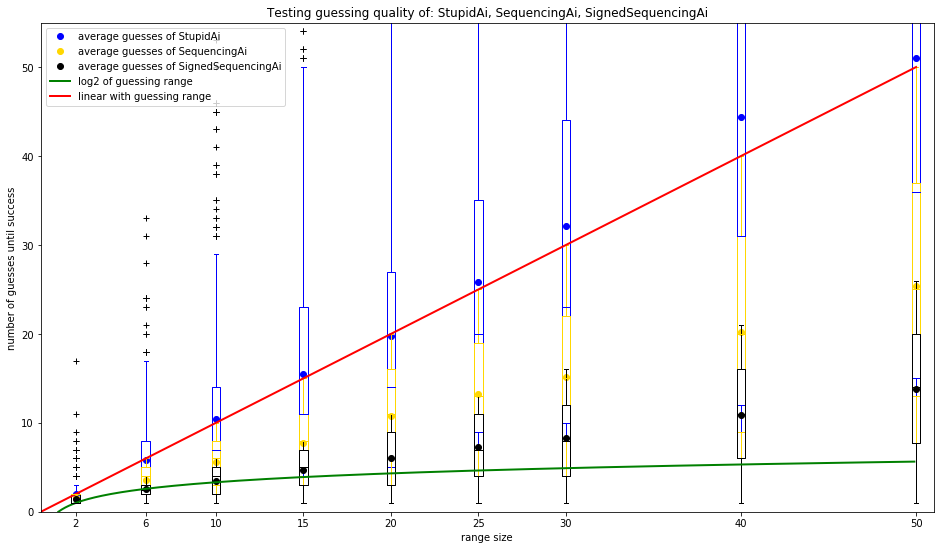

In [16]:
GuessingGameAiTester([StupidAi, SequencingAi, SignedSequencingAi]).run_tests_and_plot_results()